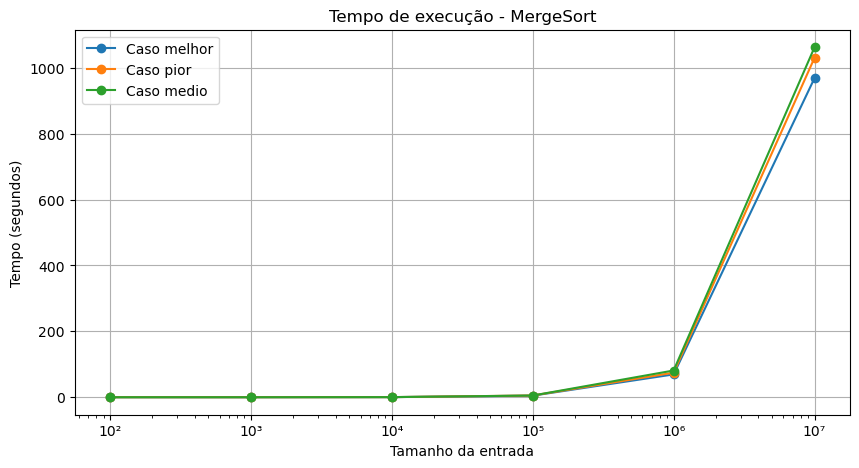

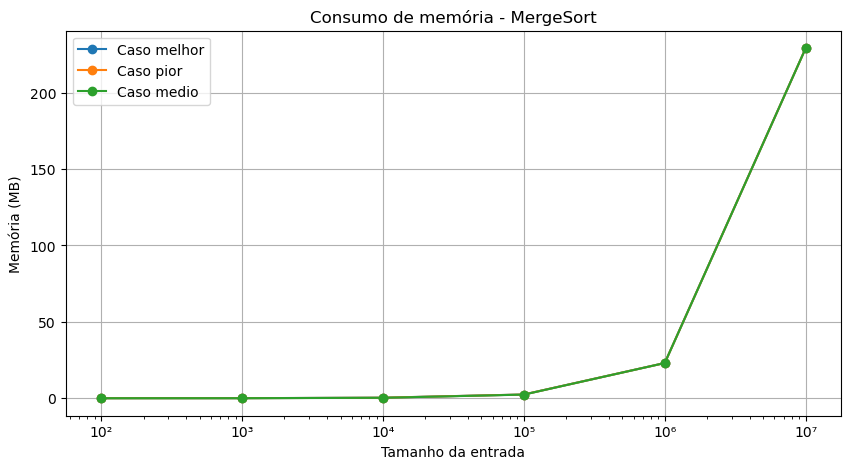

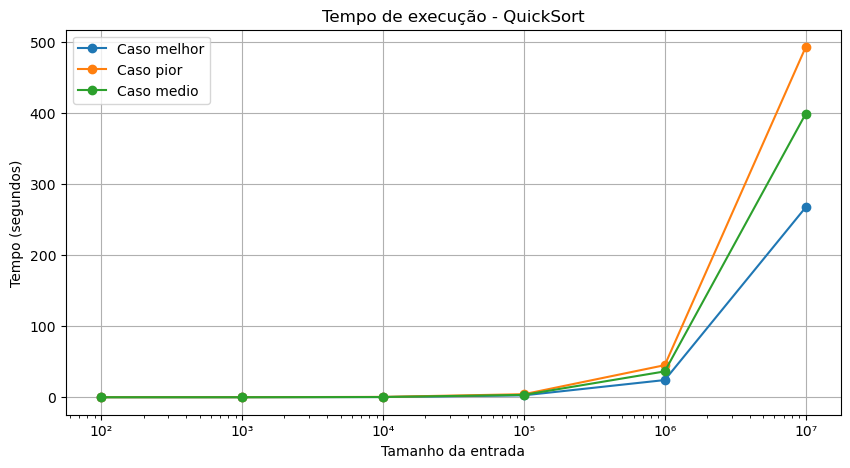

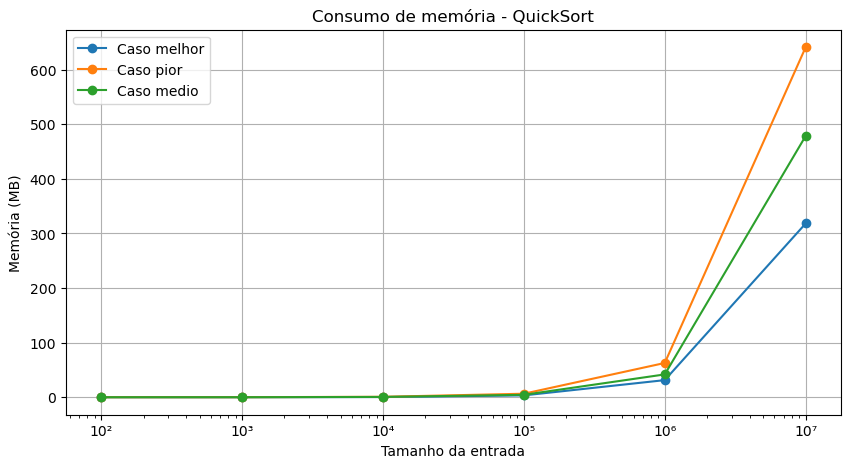

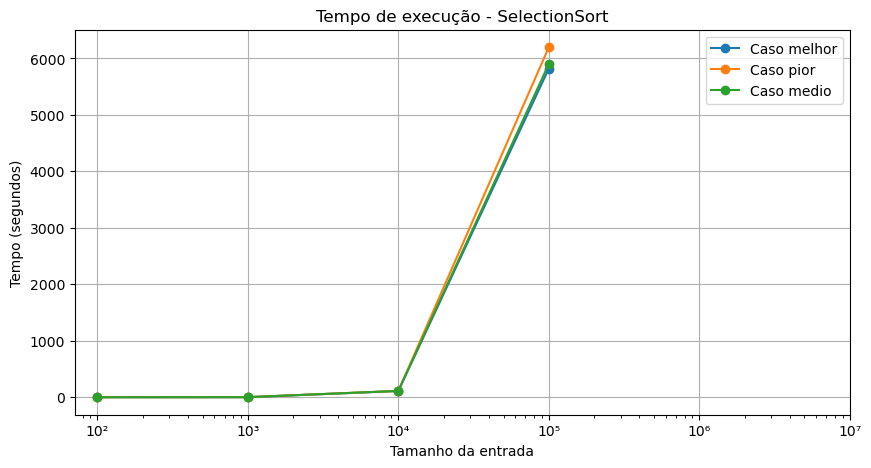

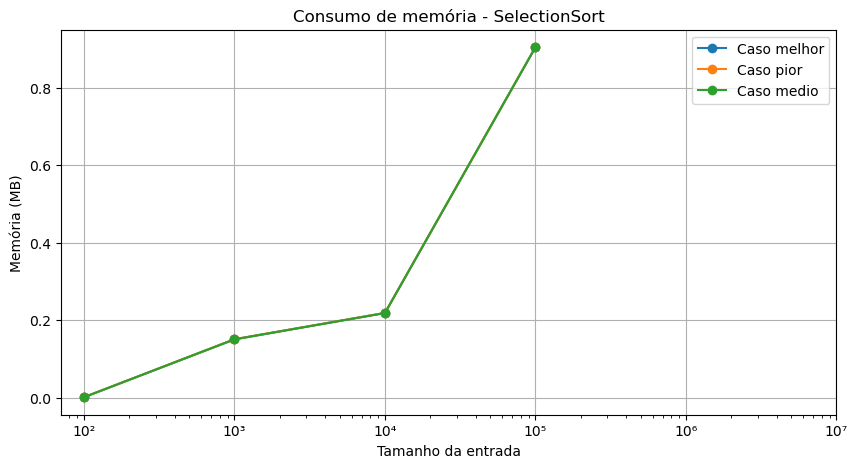

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do CSV
data = pd.read_csv('dados3.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Criar a pasta 'plots' se não existir
os.makedirs('plots', exist_ok=True)

# Função para plotar gráficos de tempo e memória para um dado algoritmo
def plot_algorithm_performance(algorithm_name):
    # Filtrar os dados para o algoritmo especificado
    df_algo = data[data['algorithm'] == algorithm_name]
    
    # Plotar gráfico de tempo
    plt.figure(figsize=(10, 5))
    for case in ['melhor', 'pior', 'medio']:
        df_case = df_algo[df_algo['case'] == case]
        plt.plot(df_case['size'], df_case['time'], marker='o', label=f'Caso {case}')
    plt.title(f'Tempo de execução - {algorithm_name}')
    plt.xlabel('Tamanho da entrada')
    plt.ylabel('Tempo (segundos)')
    plt.legend()
    plt.grid(True)
    plt.xscale('log')
    plt.xticks([10**2, 10**3, 10**4, 10**5, 10**6, 10**7], ['10²', '10³', '10⁴', '10⁵', '10⁶', '10⁷'])
    plt.savefig(f'plots/{algorithm_name}_tempo_execucao.png')
    plt.show()
    plt.close()

    # Plotar gráfico de memória
    plt.figure(figsize=(10, 5))
    for case in ['melhor', 'pior', 'medio']:
        df_case = df_algo[df_algo['case'] == case]
        plt.plot(df_case['size'], df_case['memory'], marker='o', label=f'Caso {case}')
    plt.title(f'Consumo de memória - {algorithm_name}')
    plt.xlabel('Tamanho da entrada')
    plt.ylabel('Memória (MB)')
    plt.legend()
    plt.grid(True)
    plt.xscale('log')
    plt.xticks([10**2, 10**3, 10**4, 10**5, 10**6, 10**7], ['10²', '10³', '10⁴', '10⁵', '10⁶', '10⁷'])
    plt.savefig(f'plots/{algorithm_name}_consumo_memoria.png')
    plt.show()
    plt.close()

# Lista de algoritmos para plotar
algorithms = data['algorithm'].unique()

# Gerar gráficos para cada algoritmo
for algo in algorithms:
    plot_algorithm_performance(algo)